In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline


http://e-collection.library.ethz.ch/eserv/eth:6419/eth-6419-02.pdf
http://journal.frontiersin.org/article/10.3389/fnhum.2011.00039/full


## the generative model

In [2]:
seed = 42
np.random.seed(seed)
a1, a2, sigma_1, sigma_2 = 1-1/50, 1-1/1000, 1., 0.1
N_time = 320
N_trials = 4
theta = .4
omega = -2.2
N_time = 320
N_layer = 3
sigmoid = lambda x: 1 / (1 + np.exp(-x))

time = np.arange(N_time)
x = np.zeros((N_time, N_trials, N_layer))
for i_time in time[1:]:
    x[i_time, :, 0] = np.random.rand(1, N_trials) < sigmoid(x[i_time-1, :, 1])
    x[i_time, :, 1] = a1*x[i_time-1, :, 1] + sigma_1 * np.sqrt(np.exp(x[i_time-1, :, 2])) *  np.random.randn(1, N_trials)
    x[i_time, :, 2] = a2*x[i_time-1, :, 2] + sigma_2 * np.random.randn(1, N_trials)
    

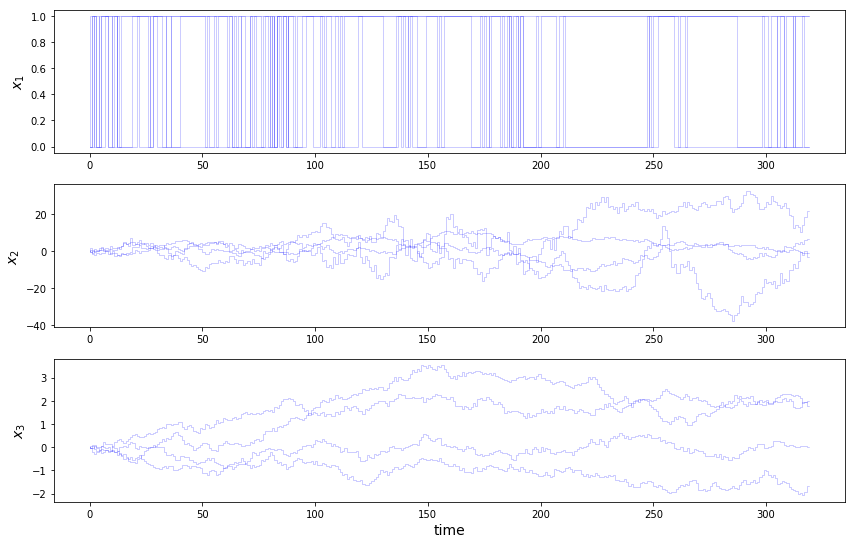

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/1.6180))
for i_layer, label in enumerate([r'$x_1$', r'$x_2$', r'$x_3$']):
    from cycler import cycler
    axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_trials+1)]))
    _ = axs[i_layer].step(time, x[:, :, i_layer], c='b', lw=.5, alpha=.4)
    axs[i_layer].axis('tight')
    axs[i_layer].set_ylabel(label, fontsize=14)
fig.tight_layout()
for i in range(1): axs[i].set_ylim(-.05, 1.05)
axs[-1].set_xlabel('time', fontsize=14);

## particle filtering - no resampling

In [4]:
np.random.seed(seed)
N_particles = 100
i_trial = 0

p = np.zeros((N_time, N_particles, N_layer+1-1))
p[0, :, 0] = 1

for i_time in time[1:]:
    # resampling
    p[i_time-1, :, 0] /= p[i_time-1, :, 0].sum()
    # prediction
    p[i_time, :, 0] = p[i_time-1, :, 0]
    p[i_time, :, 1] = a1*p[i_time-1, :, 1] + sigma_1 * np.sqrt(np.exp(p[i_time-1, :, 2])) *  np.random.randn(1, N_particles)
    p[i_time, :, 2] = a2*p[i_time-1, :, 2] + sigma_2 * np.random.randn(1, N_particles)
    # likelihood
    p[i_time, :, 0] *= sigmoid(p[i_time, :, 1])**x[i_time-1, i_trial, 0]
    p[i_time, :, 0] *= (1-sigmoid(p[i_time, :, 1]))**(1-x[i_time-1, i_trial, 0])
    p[i_time, :, 0] /= p[i_time, :, 0].sum()
    std_1 = sigma_1 * np.sqrt(np.exp(p[i_time, :, 2]))
    p[i_time, :, 0] *= 1/std_1 * np.exp( -.5 * (p[i_time, :, 1] - np.sum(p[i_time, :, 1]*p[i_time, :, 0]))**2 / std_1**2)
    p[i_time, :, 0] *= 1/sigma_2 * np.exp( -.5 * (p[i_time, :, 2] - np.sum(p[i_time, :, 2]*p[i_time, :, 0]))**2 / sigma_2**2)
    p[i_time, :, 0] /= p[i_time, :, 0].sum()


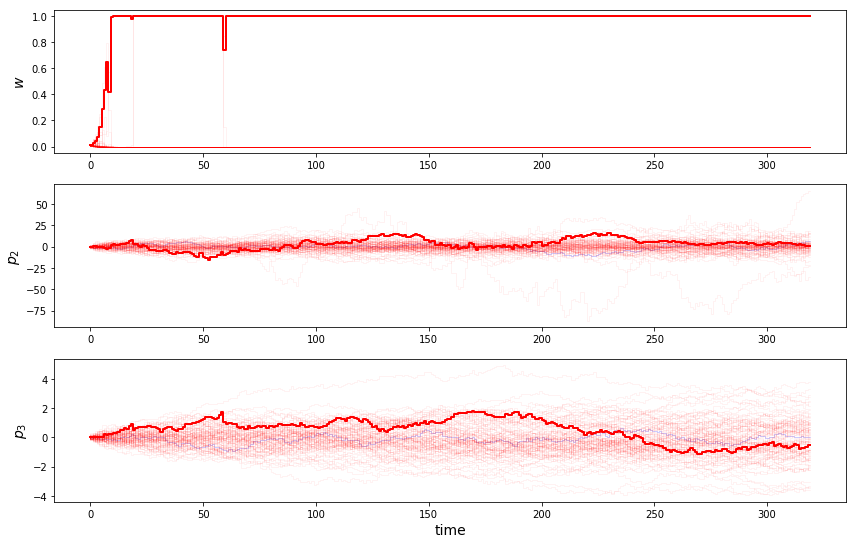

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/1.6180))
for i_layer, label in enumerate([r'$w$', r'$p_2$', r'$p_3$']):
    from cycler import cycler
    if i_layer > 0: _ = axs[i_layer].step(time, x[:, i_trial, i_layer], c='b', lw=.5, alpha=.4)
    axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_trials+1)]))
    _ = axs[i_layer].step(time, p[:, :, i_layer], c='r', lw=.5, alpha=.1)
    _ = axs[i_layer].step(time, np.sum(p[:, :, i_layer]*p[:, :, 0], axis=1), c='r', lw=2, alpha=1)
    axs[i_layer].axis('tight')
    axs[i_layer].set_ylabel(label, fontsize=14)
fig.tight_layout()
axs[-1].set_xlabel('time', fontsize=14);

In [6]:
p[0, :, 0], p[-1, :, 0]

(array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

## particle filtering - homeostatic resampling

We use some heavy cheating by injecting the true values.

In [7]:
np.random.seed(seed)
N_particles = 100
i_trial = 0

p = np.zeros((N_time, N_particles, N_layer+1-1))
p[0, :, 0] = 1./N_particles

for i_time in time[1:]:
    #print (i_time, p[i_time-1, :, 0].sum())
    particles = p[i_time-1, :, :].copy()
    # prediction
    particles[:, 1] = a1*particles[:, 1] + sigma_1 * np.sqrt(np.exp(particles[:, 2])) *  np.random.randn(1, N_particles)
    particles[:, 2] = a2*particles[:, 2] + sigma_2 * np.random.randn(1, N_particles)

    # likelihood
    particles[:, 0] *= sigmoid(particles[:, 1])**x[i_time, i_trial, 0]
    particles[:, 0] *= (1-sigmoid(particles[:, 1]))**(1-x[i_time, i_trial, 0])
    particles[:, 0] /= particles[:, 0].sum()
    std_1 = sigma_1 * np.sqrt(np.exp(p[i_time, :, 2]))
    particles[:, 0] *= 1/std_1 * np.exp( -.5 * (particles[:, 1] - x[i_time, i_trial, 1])**2 / std_1**2)
    particles[:, 0] *= 1/sigma_2 * np.exp( -.5 * (particles[:, 2] - x[i_time, i_trial, 2])**2 / sigma_2**2)
    #sigma_2_ = .1
    #particles[:, 0] *= 1/sigma_2_ * np.exp( -.5 * (particles[:, 2] - 0.)**2 / sigma_2_**2)
    particles[:, 0] /= particles[:, 0].sum()

    # resampling
    particles[:, 0] /= particles[:, 0].sum()
    address = [int(k) for k in np.interp(np.linspace(0, 1, N_particles, endpoint=False)+1/2./N_particles,
                               np.concatenate(([0.], np.cumsum(particles[:, 0]))),
                               np.arange(N_particles+1))]
    ## reassign these particles and set their weight to a uniform value
    particles[:, :] = particles[address, :]
    particles[:, 0] /= particles[:, 0].sum()
    p[i_time, :, :] = particles


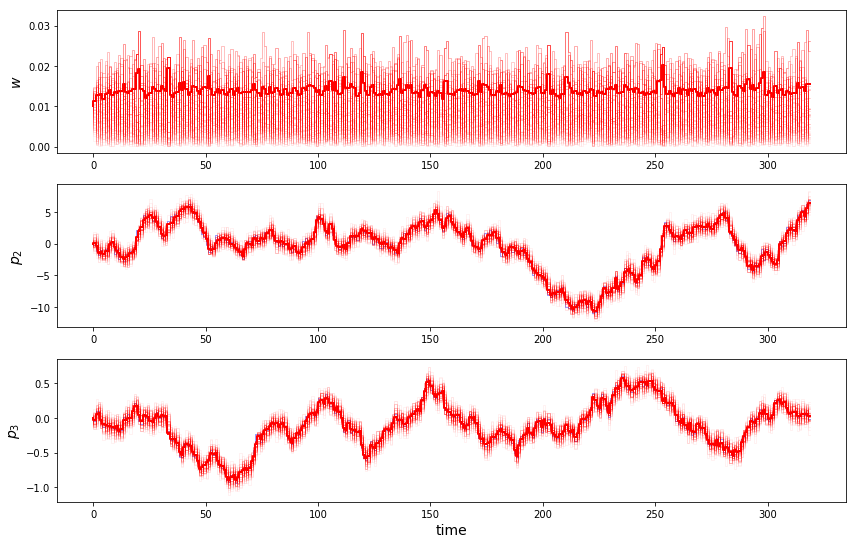

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/1.6180))
for i_layer, label in enumerate([r'$w$', r'$p_2$', r'$p_3$']):
    from cycler import cycler
    if i_layer > 0: _ = axs[i_layer].step(time, x[:, i_trial, i_layer], c='b', lw=1, alpha=.4)
    axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_trials+1)]))
    _ = axs[i_layer].step(time, p[:, :, i_layer], c='r', lw=.5, alpha=.1)
    _ = axs[i_layer].step(time, np.sum(p[:, :, i_layer]*p[:, :, 0], axis=1), c='r', lw=2, alpha=1)
    axs[i_layer].axis('tight')
    axs[i_layer].set_ylabel(label, fontsize=14)
fig.tight_layout()
axs[-1].set_xlabel('time', fontsize=14);

## particle filtering - homeostatic resampling

We still cheat, but less...

In [9]:
np.random.seed(seed)
N_particles = 100
i_trial = 0

p = np.zeros((N_time, N_particles, N_layer+1-1))
p[0, :, 0] = 1./N_particles

for i_time in time[1:]:
    #print (i_time, p[i_time-1, :, 0].sum())
    particles = p[i_time-1, :, :].copy()
    # prediction
    particles[:, 1] = a1*particles[:, 1] + sigma_1 * np.sqrt(np.exp(particles[:, 2])) *  np.random.randn(1, N_particles)
    particles[:, 2] = a2*particles[:, 2] + sigma_2 * np.random.randn(1, N_particles)

    # likelihood
    particles[:, 0] *= sigmoid(particles[:, 1])**x[i_time, i_trial, 0]
    particles[:, 0] *= (1-sigmoid(particles[:, 1]))**(1-x[i_time, i_trial, 0])
    particles[:, 0] /= particles[:, 0].sum()
    std_1 = sigma_1 * np.sqrt(np.exp(p[i_time, :, 2]))
    particles[:, 0] *= 1/std_1 * np.exp( -.5 * (particles[:, 1] - x[i_time, i_trial, 1])**2 / std_1**2)
    particles[:, 0] *= 1/sigma_2 * np.exp( -.5 * (particles[:, 2] - p[i_time-1, :, 2]/a2)**2 / sigma_2**2)
    #sigma_2_ = .1
    #particles[:, 0] *= 1/sigma_2_ * np.exp( -.5 * (particles[:, 2] - 0.)**2 / sigma_2_**2)
    particles[:, 0] /= particles[:, 0].sum()

    # resampling
    particles[:, 0] /= particles[:, 0].sum()
    address = [int(k) for k in np.interp(np.linspace(0, 1, N_particles, endpoint=False)+1/2./N_particles,
                               np.concatenate(([0.], np.cumsum(particles[:, 0]))),
                               np.arange(N_particles+1))]
    ## reassign these particles and set their weight to a uniform value
    particles[:, :] = particles[address, :]
    particles[:, 0] /= particles[:, 0].sum()
    p[i_time, :, :] = particles


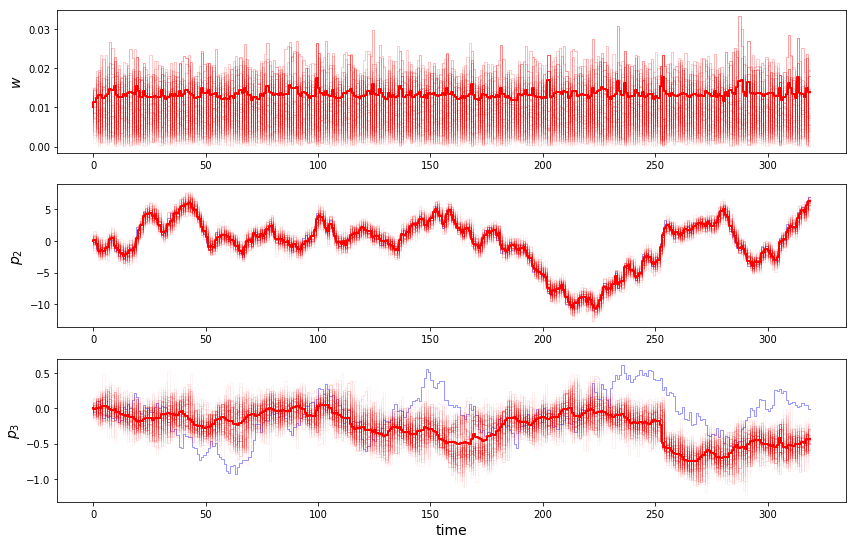

In [10]:
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/1.6180))
for i_layer, label in enumerate([r'$w$', r'$p_2$', r'$p_3$']):
    if i_layer > 0: _ = axs[i_layer].step(time, x[:, i_trial, i_layer], c='b', lw=1, alpha=.4)
    from cycler import cycler
    axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_trials+1)]))
    _ = axs[i_layer].step(time, p[:, :, i_layer], c='r', lw=.5, alpha=.1)
    _ = axs[i_layer].step(time, np.sum(p[:, :, i_layer]*p[:, :, 0], axis=1), c='r', lw=2, alpha=1)

    axs[i_layer].axis('tight')
    axs[i_layer].set_ylabel(label, fontsize=14)
fig.tight_layout()
axs[-1].set_xlabel('time', fontsize=14);

In [11]:
p[0, :, 0], p[-1, :, 0]

(array([ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01]),
 array([  2.50774761e-03,   5.65126670e-03,   5.65126670e-03,
          3.81901200e-03,   5.57019772e-03,   1.55638335e-03,
          1.63135653e-04,   1.40343028e-03,   1.20099851e-05,
          4.02889063e-03

## particle filtering - homeostatic resampling

We use some mean-field approximation / TODO: use the approximation expected by the AR(1) process.


In [12]:
np.random.seed(seed)
N_particles = 100
i_trial = 0

p = np.zeros((N_time, N_particles, N_layer+1-1))
p[0, :, 0] = 1./N_particles

for i_time in time[1:]:
    #print (i_time, p[i_time-1, :, 0].sum())
    particles = p[i_time-1, :, :].copy()
    # prediction
    particles[:, 1] = a1*particles[:, 1] + sigma_1 * np.sqrt(np.exp(particles[:, 2])) *  np.random.randn(1, N_particles)
    particles[:, 2] = a2*particles[:, 2] + sigma_2 * np.random.randn(1, N_particles)

    # likelihood
    particles[:, 0] *= sigmoid(particles[:, 1])**x[i_time, i_trial, 0]
    particles[:, 0] *= (1-sigmoid(particles[:, 1]))**(1-x[i_time, i_trial, 0])
    particles[:, 0] /= particles[:, 0].sum()
    std_1 = sigma_1 * np.sqrt(np.exp(p[i_time, :, 2]))
    particles[:, 0] *= 1/std_1 * np.exp( -.5 * (particles[:, 1] - np.sum(particles[:, 1]*particles[:, 0]))**2 / std_1**2)
    particles[:, 0] *= 1/sigma_2 * np.exp( -.5 * (particles[:, 2] - np.sum(particles[:, 2]*particles[:, 0]))**2 / sigma_2**2)
    #sigma_2_ = .1
    #particles[:, 0] *= 1/sigma_2_ * np.exp( -.5 * (particles[:, 2] - 0.)**2 / sigma_2_**2)
    particles[:, 0] /= particles[:, 0].sum()

    # resampling
    particles[:, 0] /= particles[:, 0].sum()
    address = [int(k) for k in np.interp(np.linspace(0, 1, N_particles, endpoint=False)+1/2./N_particles,
                               np.concatenate(([0.], np.cumsum(particles[:, 0]))),
                               np.arange(N_particles+1))]
    ## reassign these particles and set their weight to a uniform value
    particles[:, :] = particles[address, :]
    particles[:, 0] /= particles[:, 0].sum()
    p[i_time, :, :] = particles


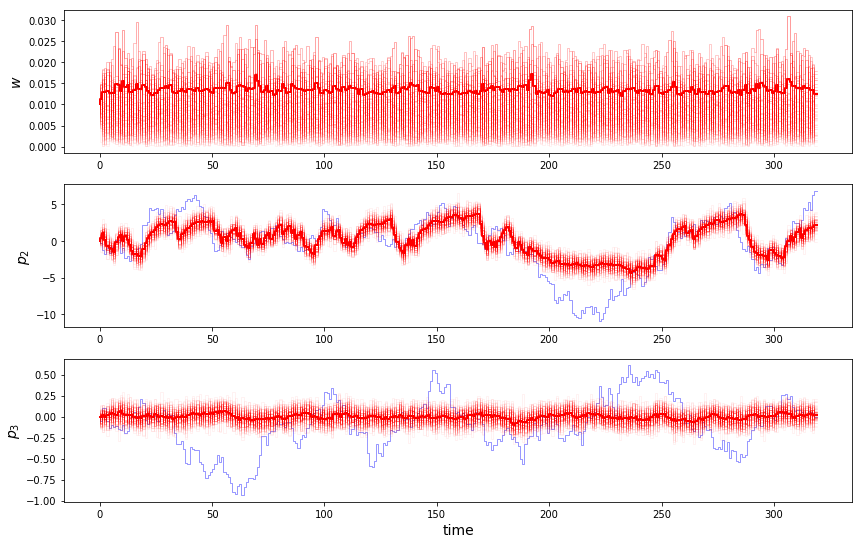

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(fig_width, fig_width/1.6180))
for i_layer, label in enumerate([r'$w$', r'$p_2$', r'$p_3$']):
    from cycler import cycler
    if i_layer > 0: _ = axs[i_layer].step(time, x[:, i_trial, i_layer], c='b', lw=1, alpha=.4)

    axs[i_layer].set_prop_cycle(cycler('color', [plt.cm.magma(h) for h in np.linspace(0, 1, N_trials+1)]))
    _ = axs[i_layer].step(time, p[:, :, i_layer], c='r', lw=.5, alpha=.1)
    _ = axs[i_layer].step(time, np.sum(p[:, :, i_layer]*p[:, :, 0], axis=1), c='r', lw=2, alpha=1)
    axs[i_layer].axis('tight')
    axs[i_layer].set_ylabel(label, fontsize=14)
fig.tight_layout()
axs[-1].set_xlabel('time', fontsize=14);